# Ecommerce - coustomers

# importing libaries (toolkit)

In [1]:
import random
import pandas as pd 
import numpy as np 

# warnings
pd.options.mode.chained_assignment = None 
import warnings
warnings.filterwarnings("ignore")

# plotting  
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

# importing & inspecting

In [2]:
ecom = pd.read_csv('Ecommerce Customers.csv')
ecom.style.background_gradient()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel Wrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common Diazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582 Cobbborough, DC 99414-7564",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway Port Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage Port Jacobville, PR 37242-1057",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611 Jeffreychester, MN 67218-7250",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692 Josephbury, WV 92213-0247",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980 DPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key West Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255 APO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385


In [3]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
ecom.describe().round(2).style.background_gradient().highlight_min(color='magenta')

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.050000,12.050000,37.060000,3.530000,499.310000
std,0.990000,0.990000,1.010000,1.000000,79.310000
min,29.530000,8.510000,33.910000,0.270000,256.670000
25%,32.340000,11.390000,36.350000,2.930000,445.040000
50%,33.080000,11.980000,37.070000,3.530000,498.890000
75%,33.710000,12.750000,37.720000,4.130000,549.310000
max,36.140000,15.130000,40.010000,6.920000,765.520000


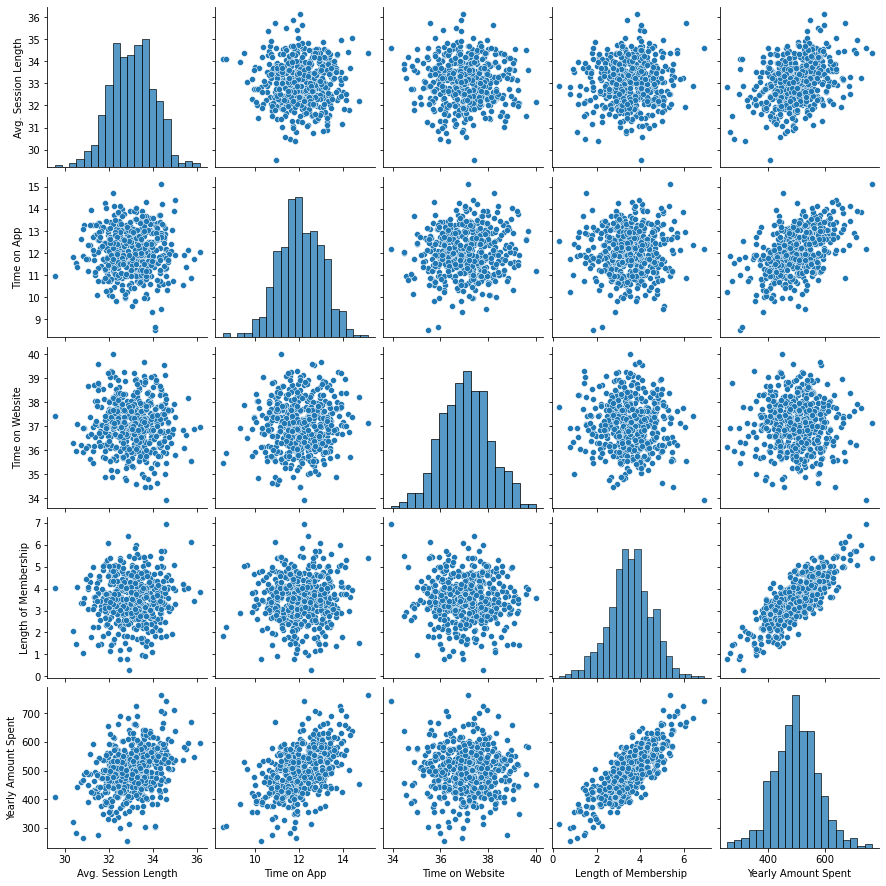

In [5]:
sns.pairplot(ecom)

<AxesSubplot:>

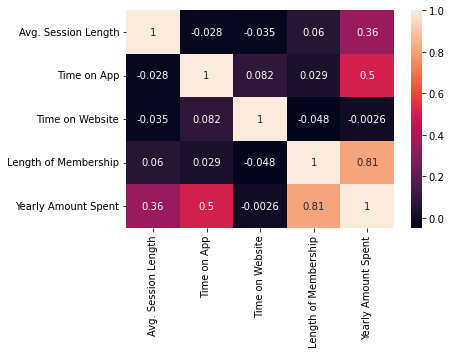

In [6]:
sns.heatmap(ecom.corr(), annot=True)

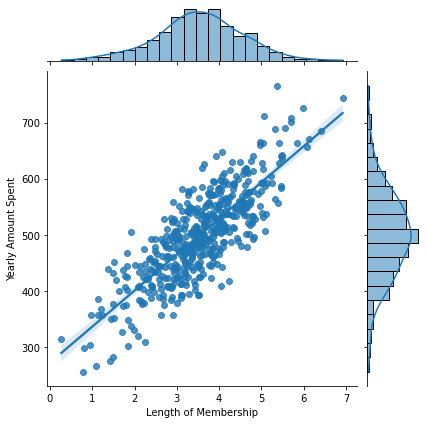

In [7]:
sns.jointplot(data=ecom, x='Length of Membership', y= 'Yearly Amount Spent', kind='reg')

# Data pre-processing

# Data splitting

In [8]:
y = ecom[['Yearly Amount Spent']] # output
y

,Yearly Amount Spent
0,587.951054
1,392.204933
2,487.547505
3,581.852344
4,599.406092
...,...
495,573.847438
496,529.049004
497,551.620145
498,456.469510


In [9]:
x = ecom[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']] ## input
x

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


## y = m * x + b

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = (train_test_split(x,y, test_size=0.2, random_state=42))

# Model Building & Training

# Model Training

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

In [14]:
model.fit(x_train,y_train)

LinearRegression()

# y = m1 * x1 + m2 * x2 + m3 * x3 + m4 * x4 + b

In [15]:
model.coef_

array([[25.5962591 , 38.78534598,  0.31038593, 61.89682859]])

# Model prediction

In [16]:
model.predict([[25,13,30,6]])

array([[480.55111021]])

In [17]:
model.predict([[70,60,80,17]])

array([[4151.67844217]])

In [18]:
y_predict = model.predict(x_test)
y_predict

array([[402.86230051],
       [542.53325708],
       [426.62011918],
       [501.91386363],
       [409.6666551 ],
       [569.92155038],
       [531.50423529],
       [505.94309188],
       [408.10378607],
       [473.45942928],
       [441.18668812],
       [424.52463471],
       [424.83341694],
       [527.12061508],
       [430.87985533],
       [423.47062047],
       [575.8751518 ],
       [484.6563331 ],
       [457.77896975],
       [481.58742311],
       [501.56110993],
       [513.12815188],
       [507.49166899],
       [646.63377343],
       [449.70050586],
       [496.26290484],
       [556.18523776],
       [554.78684161],
       [399.1582784 ],
       [325.16921284],
       [532.62732659],
       [477.73025415],
       [500.76491535],
       [305.09971374],
       [505.46811902],
       [483.52069444],
       [519.09464122],
       [437.75549737],
       [456.25005245],
       [470.63517876],
       [494.11207805],
       [444.65549239],
       [508.57079732],
       [500

In [19]:
y_test.values

array([[401.03313522],
       [534.7771881 ],
       [418.6027421 ],
       [503.97837905],
       [410.06961106],
       [557.60826205],
       [538.94197453],
       [514.33655827],
       [408.62018783],
       [475.01540709],
       [427.1993849 ],
       [434.02169975],
       [411.18696357],
       [533.51493526],
       [447.3690272 ],
       [407.54216801],
       [573.84743772],
       [497.5866713 ],
       [466.42119882],
       [467.80092437],
       [510.40138845],
       [510.50147847],
       [511.97985999],
       [640.5840619 ],
       [444.2859075 ],
       [502.77107457],
       [551.62014548],
       [548.51852928],
       [390.10327297],
       [330.59444603],
       [535.32161009],
       [478.60091594],
       [499.14015245],
       [298.76200786],
       [487.54750487],
       [498.63559849],
       [512.16586639],
       [444.96655165],
       [468.6684656 ],
       [483.15972078],
       [474.53232944],
       [439.07476674],
       [515.50247966],
       [485

# Model Evaluation

In [20]:
model.score(x,y)

0.9842900924920523

In [21]:
from sklearn.metrics import mean_absolute_error

In [22]:
print(mean_absolute_error(y_test, y_predict))

8.55844188531524


# Coeffecients

In [23]:
model.coef_

array([[25.5962591 , 38.78534598,  0.31038593, 61.89682859]])

In [24]:
## y =  25.5962591 * x1 + 38.78534598 * x2 + 0.31038593 * x3 +  61.89682859* x4 + b

## THANK  YOU